# Part 1: Introduction to Foundational Quantum Computing Tasks

1. Sampling from quantum circuits (plus an exercise)

2. Estimating expectation values of observables (plus an exercise)

# 1. Sampling from quantum circuits

### Quantum circuit: bit flip

In [1]:
# import functionality from qiskit for building and running circuits
from qiskit import QuantumCircuit, BasicAer, transpile
import numpy as np

In [2]:
# define a quantum circuit with a single "X" gate
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.measure_all()

circuit.draw()

┌───┐ ░ ┌─┐
     q: ┤ X ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

In [3]:
# select a quantum backend and run the circuit
backend = BasicAer.get_backend('qasm_simulator')
shots = 2**13

job = backend.run(circuit, shots=shots)
result = job.result()

In [4]:
# get the measurement counts from the circuit
counts = result.get_counts()
print(counts)
print('probability to measure state 0: {}%'.format(counts.get('0', 0) / shots * 100))
print('probability to measure state 1: {}%'.format(counts.get('1', 0) / shots * 100))

{'1': 8192}
probability to measure state 0: 0.0%
probability to measure state 1: 100.0%


### Quantum circuit: superposition

In [5]:
# define a quantum circuit with a single Hadamard gate
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.measure_all()

circuit.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

In [6]:
job = backend.run(transpile(circuit, backend), shots=shots)
result = job.result()

counts = result.get_counts()
print(counts)
print('probability to measure state 0: {}%'.format(counts.get('0', 0) / shots * 100))
print('probability to measure state 1: {}%'.format(counts.get('1', 0) / shots * 100))

{'1': 4065, '0': 4127}
probability to measure state 0: 50.37841796875%
probability to measure state 1: 49.62158203125%


## ! EXERCISE !

**Sample from a circuit with entangling gates.**

1. Create a circuit with both single and two-qubit entangling gates of your choosing (check out the [Qiskit Circuit Library of standard gates](https://qiskit.org/documentation/apidoc/circuit_library.html)). For example, perhaps you might build a [Bell state](https://en.wikipedia.org/wiki/Bell_state) or a [GHZ state](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state).
2. Measure all qubits in the computational basis
3. Run the circuit on the `qasm_simulator` backend
4. Plot a histogram of measurement counts (you can use Qiskit's `plot_histogram` functionality documented [here](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html))

Is the output what you expected?

# 2. Estimating expectation values 

### Example: Pauli $Z$ operator

Recall that $Z = |0\rangle\langle0| - |1\rangle\langle1|$

This means we can write the expectation of $Z$ as: 

\begin{equation}
\begin{split}
   \langle\psi|Z|\psi\rangle & = \langle\psi|0\rangle\langle0|\psi\rangle-\langle\psi|1\rangle\langle1|\psi\rangle \\
                             & = |\langle0|\psi\rangle|^2 - |\langle1|\psi\rangle|^2 \\
                             & = p(0) - p(1)
\end{split}
\end{equation}

Therefore, to estimate the expectation value of $Z$, we: 

1. Prepare a circuit representing $|\psi\rangle$
2. Measure in the computational ($Z$) basis to get the probabilities $|\langle0|\psi\rangle|^2, |\langle1|\psi\rangle|^2$
3. Subtract the probability to measure "1" from "0"

**Let's consider the state $|\psi\rangle=|1\rangle$**

In [7]:
# define the state |1>
a = 0
b = 1
state = np.array([a,b])
norm = np.linalg.norm(state)
normalized_state_ONE = state/norm

print(normalized_state_ONE)

[0. 1.]


In [8]:
# then, initialize this state as a quantum circuit and measure in computational (Z) basis
circuit = QuantumCircuit(1)
circuit.initialize(normalized_state_ONE)
circuit.measure_all()
print(circuit)

        ┌─────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0 


In [9]:
# run the circuit and then subtract the two probabilities p(0)-p(1)
job = backend.run(transpile(circuit, backend), shots=shots)
result = job.result()

counts = result.get_counts()
print(counts)

expval = (counts.get('0',0)-counts.get('1',0)) / shots
print('expectation value: {}'.format(expval))

{'1': 8192}
expectation value: -1.0


This makes sense because $\langle1|Z|1\rangle = |\langle0|1\rangle|^2-|\langle1|1\rangle|^2 = 0 - 1 = -1$

**Now, consider the state $|\psi\rangle=|+\rangle$**

In [10]:
# define the state |+>
a = 0.70710678 # 1/sqrt(2)
b = 0.70710678
state = np.array([a,b])
norm = np.linalg.norm(state)
normalized_state_PLUS = state/norm

print(normalized_state_PLUS)

[0.70710678 0.70710678]


In [11]:
# initialize as a quantum circuit and measure
circuit = QuantumCircuit(1)
circuit.initialize(normalized_state_PLUS)
circuit.measure_all()
print(circuit)

        ┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0 


In [12]:
# run the circuit and then subtract the two probabilities p(0)-p(1)
job = backend.run(transpile(circuit, backend), shots=shots)
result = job.result()

counts = result.get_counts()
print(counts)

expval = (counts.get('0',0)-counts.get('1',0)) / shots
print('expectation value: {}'.format(expval))

{'0': 4073, '1': 4119}
expectation value: -0.005615234375


This also makes sense because $\langle+|Z|+\rangle = |\langle0|+\rangle|^2-|\langle1|+\rangle|^2 = 1/2 - 1/2 = 0$ (we get close to this due to finite sampling errors)

**Why did this work?**

Because the native measurement we perform is in the computational basis, which is the eigenbasis of our original operator $Z$.

*(What if we want to measure an operator that does not share this basis?)*

In [13]:
# define the Pauli Z operator
z = np.array([[1,  0],
             [0, -1]])

Eigensystem of Z:
[-1.  1.]
[[0. 1.]
 [1. 0.]]


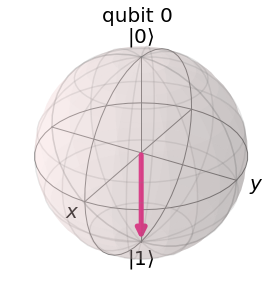

In [14]:
# what are the eigenvectors of this operator?
from qiskit.visualization import plot_state_city, plot_bloch_multivector
z_eigenvals, z_eigenvecs = np.linalg.eigh(z)

print('Eigensystem of Z:')
print(z_eigenvals)
print(z_eigenvecs)

plot_bloch_multivector(z_eigenvecs[:,0])

## ! EXERCISE !


**Compute the expectation value of the Pauli $X$ and $Y$ operators in the states $|1\rangle, |+\rangle$.**

Hint: these operators can be related to $Z$ via the following transformations: $HZH=X$ and $SHZHS^\dagger=Y$. How does this modify the math we saw above for the expectation value (and hence the circuit implementation)?

Check out [this chapter of the Qiskit Textbook for info about using single-qubit gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html).

In [15]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright